### 7-1-1. (밸류 + 퀄리티 + 모멘텀) 퀀트 re_order average momentum score

In [1]:
import pandas as pd
import numpy as np

In [2]:
# header로 read할때 \n 문자를 제거할수없어 header 해제함
file = pd.read_csv("QuantKing_2019.01.18.csv",sep=",",encoding="euc-kr",engine="python", header=None)

In [3]:
#숫자에 있는 ,(콤마) 제거하기 & 모든 공백제거하기
import re
pattern = re.compile(r'\s+')
for i in range(0,len(file.columns)):
    file[i] = file[i].apply(lambda x: re.sub(",","",str(x)))  # ,(콤마) 제거하기ㄹ
    file[i] = file[i].apply(lambda x: re.sub(pattern,"",str(x)))  # 모든 공백 제거하기

In [4]:
# 컬럼명으로 사용할 문자열에 \n 문자가 있어 제거함.
file.loc[0] = file.loc[0].apply(lambda x : x.replace("\n",""))
file.columns = file.loc[0]
file.drop(0,inplace=True)
file.head(2)

,코드번호,회사명,업종(대),업종(소),코스피코스닥,주가(원),시가총액(억),상장주식수(만주),자사주(만주),자사주비중(%),...,18년2Q,18년3Q,18년4Q(E),19년1Q(E),18년4Q매출액,18년4Q영업이익,18년4Q순이익,18년4Q매출액,18년4Q영업이익,18년4Q순이익
1,A005930,삼성전자,반도체관련장비및부품,종합반도체,코스피,42300,2525218,596978,0,0.0,...,109815,129674,100823,80507,590000,108000,nan,631770,133810,100823
2,A000660,SK하이닉스,반도체관련장비및부품,종합반도체,코스피,64600,470290,72800,4400,6.0,...,43299,46936,39811,19935,nan,nan,nan,103400,51580,39811


### 퀀트전략 자료 만들기

In [5]:
# 자산성장율 = (작년자산-재작년자산)/재작년자산
# GP/A = 매출총이익/총자산
data = file[["코드번호","회사명","3개월등락율(%)","6개월등락율(%)","9개월등락율(%)","1년등락율(%)","과거GP/A(%)","F스코어점수(9점만점)","자산성장율(연간기준)","발표PBR","과거PER","과거EV/EBITDA(%)","과거PCR","발표PSR","시가배당률(%)"]]

In [6]:
data.head()

,코드번호,회사명,3개월등락율(%),6개월등락율(%),9개월등락율(%),1년등락율(%),과거GP/A(%),F스코어점수(9점만점),자산성장율(연간기준),발표PBR,과거PER,과거EV/EBITDA(%),과거PCR,발표PSR,시가배당률(%)
1,A005930,삼성전자,-1.7,-9.8,-18.1,-14.2,35.3,7,15,1.08,5.31,3.67,3.81,1.04,2.0
2,A000660,SK하이닉스,-6.5,-22.3,-23.5,-11.9,43.7,7,41,1.08,3.06,1.77,2.35,1.19,1.5
3,A068270,셀트리온,-17.0,-19.6,-23.9,-28.9,19.4,6,15,10.15,76.07,44.09,57.86,25.37,0.0
4,A051910,LG화학,12.0,-1.1,-1.1,-13.0,19.5,4,22,1.53,15.59,6.98,10.89,0.95,1.6
5,A005380,현대차,12.4,0.8,-18.1,-19.1,8.8,6,0,0.41,10.48,11.31,5.53,0.29,3.1


### 모멘텀 통합스코어

In [7]:
# 내림차순으로 정렬 ascending = False
momenum_rank = (data["3개월등락율(%)"].rank(ascending=False) \
                + data["6개월등락율(%)"].rank(ascending=False) \
                + data["9개월등락율(%)"].rank(ascending=False) \
                + data["1년등락율(%)"].rank(ascending=False)) \
                /4  #평균 스코어
momenum_rank.name = "momenum_rank"
pd.concat([data,momenum_rank],axis=1)

,코드번호,회사명,3개월등락율(%),6개월등락율(%),9개월등락율(%),1년등락율(%),과거GP/A(%),F스코어점수(9점만점),자산성장율(연간기준),발표PBR,과거PER,과거EV/EBITDA(%),과거PCR,발표PSR,시가배당률(%),momenum_rank
1,A005930,삼성전자,-1.7,-9.8,-18.1,-14.2,35.3,7,15,1.08,5.31,3.67,3.81,1.04,2.0,1594.875
2,A000660,SK하이닉스,-6.5,-22.3,-23.5,-11.9,43.7,7,41,1.08,3.06,1.77,2.35,1.19,1.5,1548.625
3,A068270,셀트리온,-17.0,-19.6,-23.9,-28.9,19.4,6,15,10.15,76.07,44.09,57.86,25.37,0.0,1564.625
4,A051910,LG화학,12.0,-1.1,-1.1,-13.0,19.5,4,22,1.53,15.59,6.98,10.89,0.95,1.6,1715.875
5,A005380,현대차,12.4,0.8,-18.1,-19.1,8.8,6,0,0.41,10.48,11.31,5.53,0.29,3.1,1234.000
6,A017670,SK텔레콤,-4.8,12.8,19.8,-3.8,44.9,7,7,0.99,6.73,5.91,6.06,1.28,3.7,880.250
7,A207940,삼성바이오로직스,-4.2,6.8,-20.9,3.2,2.4,6,-5,7.07,-247.35,152.55,469.40,50.53,0.0,846.125
8,A005490,POSCO,0.6,-20.3,-24.9,-31.9,11.7,8,-1,0.51,7.35,3.76,3.38,0.36,3.0,1313.875
9,A015760,한국전력,28.7,2.9,-5.4,-4.0,1.7,4,2,0.31,-11.40,7.25,2.38,0.36,2.3,677.500
10,A028260,삼성물산,3.6,-3.3,-14.7,-14.0,9.1,7,10,1.02,18.41,14.43,13.47,0.71,1.7,1374.125


In [8]:
momenum_rank.describe()

count    2076.000000
mean     1038.500000
std       399.414517
min        14.625000
25%       769.156250
50%      1100.937500
75%      1329.218750
max      1977.500000
Name: momenum_rank, dtype: float64

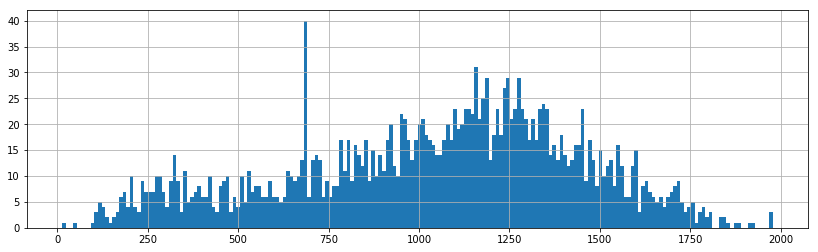

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True
plt.hist(momenum_rank, bins=200);

### 퀄리티 통합스코어

In [10]:
# 자산성장률은 오름차순으로 정력한다
quality_rank = (data["과거GP/A(%)"].rank(ascending=False) \
                + data["F스코어점수(9점만점)"].rank(ascending=True) \
                + data["자산성장율(연간기준)"].rank(ascending=False)) \
                /3  #평균 스코어
quality_rank.name = "quality_rank"
pd.concat([data,momenum_rank],axis=1)

,코드번호,회사명,3개월등락율(%),6개월등락율(%),9개월등락율(%),1년등락율(%),과거GP/A(%),F스코어점수(9점만점),자산성장율(연간기준),발표PBR,과거PER,과거EV/EBITDA(%),과거PCR,발표PSR,시가배당률(%),momenum_rank
1,A005930,삼성전자,-1.7,-9.8,-18.1,-14.2,35.3,7,15,1.08,5.31,3.67,3.81,1.04,2.0,1594.875
2,A000660,SK하이닉스,-6.5,-22.3,-23.5,-11.9,43.7,7,41,1.08,3.06,1.77,2.35,1.19,1.5,1548.625
3,A068270,셀트리온,-17.0,-19.6,-23.9,-28.9,19.4,6,15,10.15,76.07,44.09,57.86,25.37,0.0,1564.625
4,A051910,LG화학,12.0,-1.1,-1.1,-13.0,19.5,4,22,1.53,15.59,6.98,10.89,0.95,1.6,1715.875
5,A005380,현대차,12.4,0.8,-18.1,-19.1,8.8,6,0,0.41,10.48,11.31,5.53,0.29,3.1,1234.000
6,A017670,SK텔레콤,-4.8,12.8,19.8,-3.8,44.9,7,7,0.99,6.73,5.91,6.06,1.28,3.7,880.250
7,A207940,삼성바이오로직스,-4.2,6.8,-20.9,3.2,2.4,6,-5,7.07,-247.35,152.55,469.40,50.53,0.0,846.125
8,A005490,POSCO,0.6,-20.3,-24.9,-31.9,11.7,8,-1,0.51,7.35,3.76,3.38,0.36,3.0,1313.875
9,A015760,한국전력,28.7,2.9,-5.4,-4.0,1.7,4,2,0.31,-11.40,7.25,2.38,0.36,2.3,677.500
10,A028260,삼성물산,3.6,-3.3,-14.7,-14.0,9.1,7,10,1.02,18.41,14.43,13.47,0.71,1.7,1374.125


In [11]:
quality_rank.describe()

count    2076.000000
mean     1038.500000
std       323.627294
min       116.333333
25%       822.291667
50%      1041.583333
75%      1261.541667
max      1947.000000
Name: quality_rank, dtype: float64

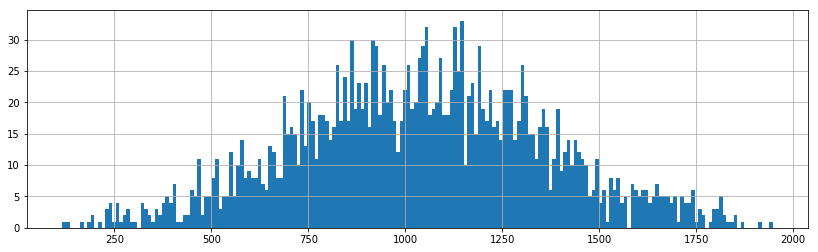

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True
plt.hist(quality_rank, bins=200);

### 밸류 통합스코어

In [13]:
#  1/지표 값 구하기
PBR = data["발표PBR"].apply(lambda x: 1/float(x) if float(x) != 0 else 0)
PER = data["과거PER"].apply(lambda x: 1/float(x) if float(x) != 0 else 0)
EBITDA = data["과거EV/EBITDA(%)"].apply(lambda x: 1/float(x) if float(x) != 0 else 0)
PCR = data["과거PCR"].apply(lambda x: 1/float(x) if float(x) != 0 else 0)
PSR = data["발표PSR"].apply(lambda x: 1/float(x) if float(x) != 0 else 0)

In [14]:
value_rank = (PBR.rank(ascending=False) \
                + PER.rank(ascending=True) \
                + EBITDA.rank(ascending=False) \
                + PCR.rank(ascending=False) \
                + PSR.rank(ascending=False) \
                + data["시가배당률(%)"].rank(ascending=False)) \
                /6  #평균 스코어
value_rank.name = "quality_rank"
pd.concat([data,value_rank],axis=1)

,코드번호,회사명,3개월등락율(%),6개월등락율(%),9개월등락율(%),1년등락율(%),과거GP/A(%),F스코어점수(9점만점),자산성장율(연간기준),발표PBR,과거PER,과거EV/EBITDA(%),과거PCR,발표PSR,시가배당률(%),quality_rank
1,A005930,삼성전자,-1.7,-9.8,-18.1,-14.2,35.3,7,15,1.08,5.31,3.67,3.81,1.04,2.0,787.250000
2,A000660,SK하이닉스,-6.5,-22.3,-23.5,-11.9,43.7,7,41,1.08,3.06,1.77,2.35,1.19,1.5,817.083333
3,A068270,셀트리온,-17.0,-19.6,-23.9,-28.9,19.4,6,15,10.15,76.07,44.09,57.86,25.37,0.0,1522.333333
4,A051910,LG화학,12.0,-1.1,-1.1,-13.0,19.5,4,22,1.53,15.59,6.98,10.89,0.95,1.6,895.666667
5,A005380,현대차,12.4,0.8,-18.1,-19.1,8.8,6,0,0.41,10.48,11.31,5.53,0.29,3.1,571.583333
6,A017670,SK텔레콤,-4.8,12.8,19.8,-3.8,44.9,7,7,0.99,6.73,5.91,6.06,1.28,3.7,797.666667
7,A207940,삼성바이오로직스,-4.2,6.8,-20.9,3.2,2.4,6,-5,7.07,-247.35,152.55,469.40,50.53,0.0,1533.583333
8,A005490,POSCO,0.6,-20.3,-24.9,-31.9,11.7,8,-1,0.51,7.35,3.76,3.38,0.36,3.0,496.250000
9,A015760,한국전력,28.7,2.9,-5.4,-4.0,1.7,4,2,0.31,-11.40,7.25,2.38,0.36,2.3,275.750000
10,A028260,삼성물산,3.6,-3.3,-14.7,-14.0,9.1,7,10,1.02,18.41,14.43,13.47,0.71,1.7,890.833333


In [15]:
value_rank.describe()

count    2076.000000
mean     1038.500000
std       324.066503
min       137.833333
25%       788.770833
50%      1053.333333
75%      1307.833333
max      1768.333333
Name: quality_rank, dtype: float64

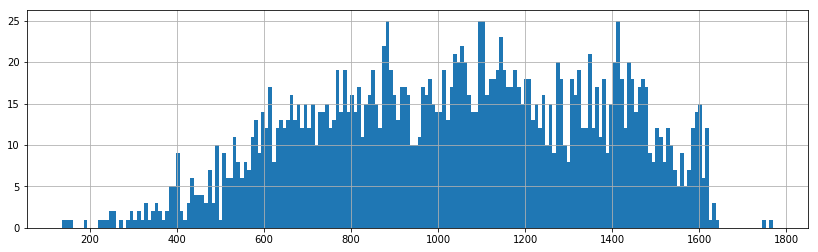

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True
plt.hist(value_rank, bins=200);

### 종합순위

In [17]:
total_rank = momenum_rank + quality_rank + value_rank
total_rank.name = "total_rank"
data = pd.concat([data,total_rank],axis=1)

In [18]:
data.columns

Index(['코드번호', '회사명', '3개월등락율(%)', '6개월등락율(%)', '9개월등락율(%)', '1년등락율(%)',
       '과거GP/A(%)', 'F스코어점수(9점만점)', '자산성장율(연간기준)', '발표PBR', '과거PER',
       '과거EV/EBITDA(%)', '과거PCR', '발표PSR', '시가배당률(%)', 'total_rank'],
      dtype='object')

In [23]:
top200 = data.sort_values("total_rank")["코드번호"].head(200)

In [26]:
data.sort_values("total_rank")["total_rank"].head()

1246    1537.791667
2023    1585.833333
1988    1632.291667
1720    1662.291667
1857    1667.333333
Name: total_rank, dtype: float64

In [20]:
data.to_csv("밸류퀄리티모멘텀_종합순위.csv",sep=",",encoding="euc-kr")